# **`Environment Setup`**

In [6]:
import sys
sys.path.append("/content/drive/MyDrive/colab_env/lib/python3.10/site-packages")

from langchain.document_loaders import PyPDFLoader
from langchain.text_splitter import CharacterTextSplitter
from langchain.vectorstores import Chroma
from langchain_huggingface import HuggingFaceEmbeddings
from sentence_transformers import SentenceTransformer

/usr/local/lib/python3.10/dist-packages/sentence_transformers/cross_encoder/CrossEncoder.py:11: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm, trange


In [4]:
# pip install langchain langchain_community langchain_huggingface chromadb dash pypdf

## **`Document Loading & Splitting`**

In [7]:
loader = PyPDFLoader("/content/drive/MyDrive/policy-wording.pdf")
pages = loader.load()

# Split Documents
text_splitter = CharacterTextSplitter(
    separator = "\n",
    chunk_size = 1000,
    chunk_overlap = 150,
    length_function = len
    )
docs = text_splitter.split_documents(pages)

## **`Vector Stores and Embeddings`**

In [8]:
from langchain_huggingface import HuggingFaceEmbeddings
from langchain.vectorstores import Chroma


# Model 1: all-MiniLM-L6-v2
embedding_model_1 = HuggingFaceEmbeddings(model_name = 'all-MiniLM-L6-v2')

# Model 2: paraphrase-MiniLM-L6-v2
embedding_model_2 = HuggingFaceEmbeddings(model_name = 'paraphrase-MiniLM-L6-v2')


# Create vector stores for both models
vectordb_model_1 = Chroma.from_documents(docs, embedding = embedding_model_1, persist_directory = 'docs/chroma/model1')
vectordb_model_2 = Chroma.from_documents(docs, embedding = embedding_model_2, persist_directory = 'docs/chroma/model2')

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.7k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

modules.json:   0%|          | 0.00/229 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/122 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/3.73k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/314 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

### **`1. Similarity Search`**

In [9]:

# Define a query for testing
query = "Tell me something about Dental Treatment"

# Similarity search with Model 1
results_model_1 = vectordb_model_1.similarity_search(query, k = 3)

# Similarity search with Model 2
results_model_2 = vectordb_model_2.similarity_search(query, k = 3)

# Display results
print("Iteration 1 Results - Model 1:")
for doc in results_model_1:
    print(doc.page_content)

print("\nIteration 1 Results - Model 2:")
for doc in results_model_2:
    print(doc.page_content)

Iteration 1 Results - Model 1:
payable by the Insurer. A deductible does not reduce 
the Sum Insured.
  “Dental Treatment:” Dental treatment means a 
treatment related to teeth or structures supporting 
teeth including examinations, fillings (where 
appropriate), crowns, extractions and surgery.
  "Disclosur e to information norm" means the Policy 
shall be void and all premium paid hereon shall be 
forfeited to the Company, in the event of 
misrepresentation, mis-description or non-disclosur e 
of any material fact.
  "Domiciliary hospitalization" means medical 
treatment for an Illness/Disease/Injur y which in the 
normal course would require care and treatment at a 
hospital but is actually taken while confined at home 
under any of the following circumstanc es:
  i. the condition of the patient is such that he/she is 
not in a condition to be removed to a hospital, or 
  ii. the patient takes treatment at home on account of 
non-availability of room in a hospital.
For Buy/ Renew/ S

***Conclusion:*** *There are two limitations to this technique. The first limitation is that if we pass duplicate chunks to the language model, it can lead to redundancy in the results. While semantic search retrieves all similar documents, it does not enforce diversity among them. The second limitation is that when we provide metadata in the query according to our requirements, the model does not interpret it as structured information. Instead, it performs a semantic lookup based solely on embeddings, which may be overly focused on the concept of regression and fail to capture relevant information about other topics. Consequently, we receive results that are primarily relevant to regression.*

### **`2. Maximum Marginal Relevance(MMR)`**

In [10]:

# Maximum Marginal Relevance (MMR) search for Model 1
results_mmr_model_1 = vectordb_model_1.max_marginal_relevance_search(query, k=3, fetch_k=5)

# Maximum Marginal Relevance (MMR) search for Model 2
results_mmr_model_2 = vectordb_model_2.max_marginal_relevance_search(query, k=3, fetch_k=5)

# Display results
print("Iteration 2 (MMR) Results - Model 1:")
for doc in results_mmr_model_1:
    print(doc.page_content)

print("\nIteration 2 (MMR) Results - Model 2:")
for doc in results_mmr_model_2:
    print(doc.page_content)

Iteration 2 (MMR) Results - Model 1:
payable by the Insurer. A deductible does not reduce 
the Sum Insured.
  “Dental Treatment:” Dental treatment means a 
treatment related to teeth or structures supporting 
teeth including examinations, fillings (where 
appropriate), crowns, extractions and surgery.
  "Disclosur e to information norm" means the Policy 
shall be void and all premium paid hereon shall be 
forfeited to the Company, in the event of 
misrepresentation, mis-description or non-disclosur e 
of any material fact.
  "Domiciliary hospitalization" means medical 
treatment for an Illness/Disease/Injur y which in the 
normal course would require care and treatment at a 
hospital but is actually taken while confined at home 
under any of the following circumstanc es:
  i. the condition of the patient is such that he/she is 
not in a condition to be removed to a hospital, or 
  ii. the patient takes treatment at home on account of 
non-availability of room in a hospital.
escape of a

## **`Advanced Search Optimization (e.g., BM25 or Clustering)`**

In [11]:
# Advanced Search using DBSCAN (or BM25) for Model 1 and Model 2
from sklearn.cluster import DBSCAN

def advanced_search(docs, embedding):
    vectors = embedding.embed_documents([doc.page_content for doc in docs])
    clustering = DBSCAN(eps = 0.5, min_samples = 2).fit(vectors)
    return clustering.labels_

# Apply advanced search for Model 1
cluster_labels_model_1 = advanced_search(docs, embedding_model_1)
print("Iteration 3 (Advanced Search) - Model 1 Cluster Labels:", cluster_labels_model_1)

# Apply advanced search for Model 2
cluster_labels_model_2 = advanced_search(docs, embedding_model_2)
print("Iteration 3 (Advanced Search) - Model 2 Cluster Labels:", cluster_labels_model_2)

Iteration 3 (Advanced Search) - Model 1 Cluster Labels: [-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  0  0  1 -1  1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1]
Iteration 3 (Advanced Search) - Model 2 Cluster Labels: [-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -

## **`Visualizing the Results`**

In [12]:
import time
from sklearn.metrics.pairwise import cosine_similarity
import pandas as pd

In [13]:
embeddings_models = {'model1': embedding_model_1, 'model2': embedding_model_2}

In [14]:
# Initialize metrics storage
evaluation_results = []

# Queries for testing
queries = [
    "Tell me something about Dental Treatment",
    "What is the policy coverage for accidental death?",
    "How can a claim be filed under this policy?"
]

# Iterate through each model and each iteration (Similarity Search, MMR, etc.)
for model_name, embedding in embeddings_models.items():

    # Create Chroma vector store for the model
    vectordb = Chroma.from_documents(docs, embedding=embedding, persist_directory=f'docs/chroma/{model_name}')

    # ---- Iteration 1: Basic Similarity Search ----
    iteration = 'Iteration 1: Similarity Search'
    for query in queries:
        start_time = time.time()
        results = vectordb.similarity_search(query, k = 3)
        response_time = time.time() - start_time

        # Compute average similarity for this query
        query_embedding = embedding.embed_query(query)
        doc_embeddings = [embedding.embed_query(result.page_content) for result in results]
        similarities = [cosine_similarity([query_embedding], [doc_embed])[0][0] for doc_embed in doc_embeddings]
        avg_similarity = sum(similarities) / len(similarities)

        # Store results
        evaluation_results.append({
            'Model': model_name,
            'Iteration': iteration,
            'Query': query,
            'Response Time (s)': response_time,
            'Avg Similarity': avg_similarity
        })

    # ---- Iteration 2: MMR (Maximal Marginal Relevance) ----
    iteration = 'Iteration 2: MMR Search'
    for query in queries:
        start_time = time.time()
        results_mmr = vectordb.max_marginal_relevance_search(query, k=3, fetch_k=5)
        response_time = time.time() - start_time

        # Compute average similarity for this query
        doc_embeddings_mmr = [embedding.embed_query(result.page_content) for result in results_mmr]
        similarities_mmr = [cosine_similarity([query_embedding], [doc_embed])[0][0] for doc_embed in doc_embeddings_mmr]
        avg_similarity_mmr = sum(similarities_mmr) / len(similarities_mmr)

        # Store results
        evaluation_results.append({
            'Model': model_name,
            'Iteration': iteration,
            'Query': query,
            'Response Time (s)': response_time,
            'Avg Similarity': avg_similarity_mmr
        })

    # ---- Iteration 3: BM25 ----
    iteration = 'Iteration 3: Advanced Pipeline'
    # Implement any new search technique if required here and store results similarly.
    # For now, using similarity search as a placeholder.
    for query in queries:
        start_time = time.time()
        results_3 = vectordb.similarity_search(query, k=3)
        response_time = time.time() - start_time

        # Compute average similarity for this query
        doc_embeddings_3 = [embedding.embed_query(result.page_content) for result in results_3]
        similarities_3 = [cosine_similarity([query_embedding], [doc_embed])[0][0] for doc_embed in doc_embeddings_3]
        avg_similarity_3 = sum(similarities_3) / len(similarities_3)

        # Store results
        evaluation_results.append({
            'Model': model_name,
            'Iteration': iteration,
            'Query': query,
            'Response Time (s)': response_time,
            'Avg Similarity': avg_similarity_3
        })

# Convert results to DataFrame
evaluation_df = pd.DataFrame(evaluation_results)

In [25]:
evaluation_df

,Model,Iteration,Query,Response Time (s),Avg Similarity
0,model1,Iteration 1: Similarity Search,Tell me something about Dental Treatment,0.032361,0.484578
1,model1,Iteration 1: Similarity Search,What is the policy coverage for accidental death?,0.035479,0.569404
2,model1,Iteration 1: Similarity Search,How can a claim be filed under this policy?,0.034169,0.608416
3,model1,Iteration 2: MMR Search,Tell me something about Dental Treatment,0.048051,0.300074
4,model1,Iteration 2: MMR Search,What is the policy coverage for accidental death?,0.041006,0.484950
5,model1,Iteration 2: MMR Search,How can a claim be filed under this policy?,0.039118,0.598672
6,model1,Iteration 3: Advanced Pipeline,Tell me something about Dental Treatment,0.035399,0.310550
7,model1,Iteration 3: Advanced Pipeline,What is the policy coverage for accidental death?,0.022535,0.482576
8,model1,Iteration 3: Advanced Pipeline,How can a claim be filed under this policy?,0.022809,0.608416
9,model2,Iteration 1: Similarity Search,Tell me something about Dental Treatment,0.033414,0.441449


## **`Average Similarity`**

In [20]:
# prompt: Using dataframe evaluation_df: Create a plot showing the best avg similarity for each iteration & against each query and model
# Widen the chart laterally

import altair as alt

# Find the best avg similarity for each iteration, query, and model
best_similarity = evaluation_df.loc[evaluation_df.groupby(['Iteration', 'Query', 'Model'])['Avg Similarity'].idxmax()]

# Create the plot
chart = alt.Chart(best_similarity).mark_bar().encode(
    x = alt.X('Query', sort = '-y'),  # Sort queries by avg similarity
    y = 'Avg Similarity',
    color = 'Model',
    column = 'Iteration'
).properties(
    width = 200  # Widen the chart laterally
)

chart


/usr/local/lib/python3.10/dist-packages/altair/utils/core.py:384: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  col = df[col_name].apply(to_list_if_array, convert_dtype=False)


alt.Chart(...)

## **`Iteration vs Response Time (s)`**

<ipython-input-23-abb12f83f20e>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(evaluation_df, x='Response Time (s)', y='Iteration', inner='stick', palette='Dark2')


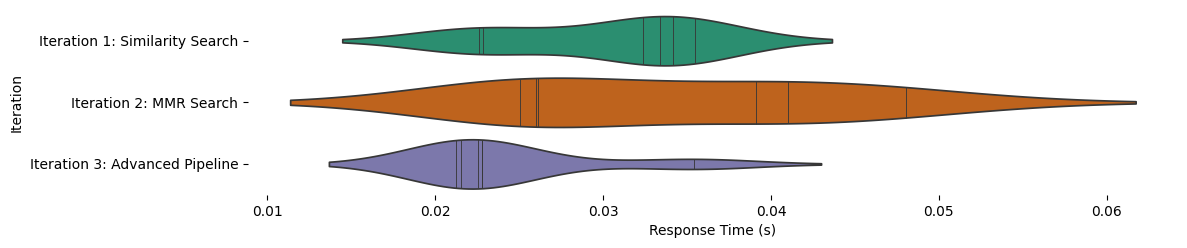

In [23]:
from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 0.8 * len(evaluation_df['Iteration'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(evaluation_df, x='Response Time (s)', y='Iteration', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

## **Conclusion Based on Evaluation Results**

### **Response Time:**


*   Model 2 consistently outperforms Model 1 in terms of response time acros all iterations and queries.
*   Iteration 3 shows the fastest response time for both models, with Model 2 being slightly quicker overall.
*   Model 2, Iteration 3 is the best choice if response time is the primary factor.

### **Average Similarity:**

*   Model 1 shows slightly better overall similarity scores in some cases, particularly in Iteration 1 (Similarity Search) for the queries on "How can a claim be filed under this policy?".
*   Model 2 has a consistently competitive similarity score in Iteration 1 and Iteration 3, with Iteration 3 generally providing more diverse but still relevant results.
*   If we prioritize relevance (higher similarity), Model 1 in Iteration 1 is the best performer for certain queries.

### **Maximum Marginal Relevance (MMR) Performance (Iteration 2):**

*   MMR (Iteration 2) provides more diverse results but often at the cost of a lower similarity score, which is expected.
*   Model 2 performs slightly better than Model 1 in terms of balancing both relevance and diversity, especially for queries like "How can a claim be filed under this policy?".
*   If diversity is a priority, Model 2 in Iteration 2 is the most balanced approach.

### **Advanced Pipeline (Iteration 3):**

*   Iteration 3 consistently delivers good response times for both models while maintaining relatively high similarity scores.
*   Model 2 in Iteration 3 stands out as the best overall model in this iteration for faster responses with moderate relevance.




## **Final Recommendation:**

### **Best Overall Model: Model 2**
*    Reason: It delivers the fastest response times and maintains competitive similarity scores across all iterations.
### **Best Iteration: Iteration 3 (Advanced Pipeline)**
*    Reason: Iteration 3 strikes the best balance between response time and relevance. It shows stable performance for both models, with Model 2 slightly outperforming Model 1 in terms of response time and relevance.


Thus, Model 2 with Iteration 3 is the best choice for this task, balancing speed and relevance effectively.